#1. Download the dataset:

#2. Load the dataset into the tool.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Mall_Customers.csv') # Importing the dataset
df.sample(5) #previewing dataset randomly

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
108,109,Male,68,63,43
72,73,Female,60,50,49
138,139,Male,19,74,10
193,194,Female,38,113,91
17,18,Male,20,21,66


In [2]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#3. Perform Below Visualizations.
∙ **Univariate Analysis**

<function matplotlib.pyplot.show(*args, **kw)>

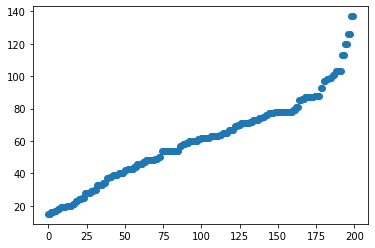

In [3]:
plt.scatter(df.index,df['Annual Income (k$)'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

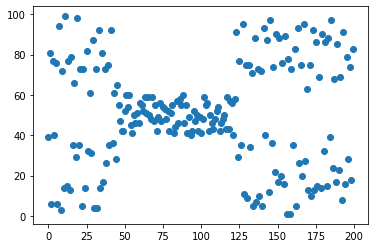

In [4]:
plt.scatter(df.index,df['Spending Score (1-100)'])
plt.show

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

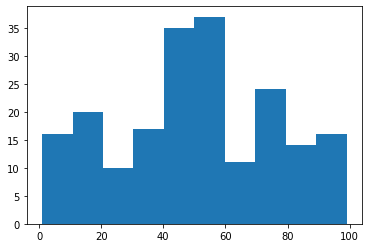

In [5]:
plt.hist(df['Spending Score (1-100)'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

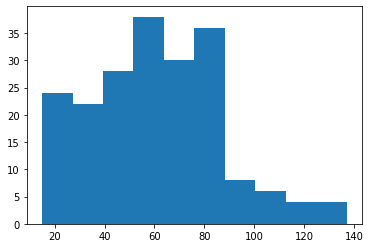

In [6]:
plt.hist(df['Annual Income (k$)'])

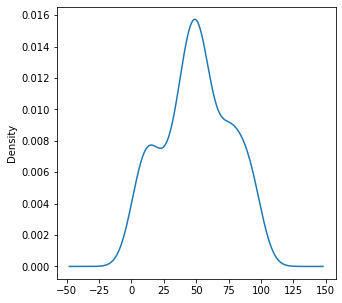

In [7]:
plt.figure(figsize=(5,5))
df['Spending Score (1-100)'].plot(kind='density')

∙ **Bi- Variate Analysis**

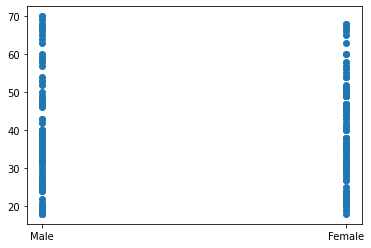

In [8]:
plt.scatter(df.Gender, df.Age)

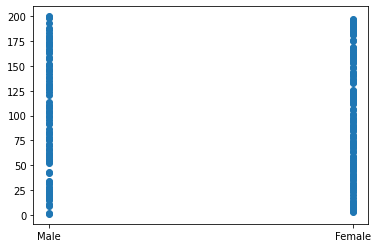

In [9]:
plt.scatter(df.Gender, df.CustomerID)

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [11]:
import statsmodels.api as sm
y = df['Annual Income (k$)']
x = df[['Spending Score (1-100)']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Annual Income (k$)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01942
Date:                Tue, 01 Nov 2022   Prob (F-statistic):              0.889
Time:                        14:04:32   Log-Likelihood:                -936.92
No. Observations:                 200   AIC:                             1878.
Df Residuals:                     198   BIC:                             1884.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     60

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


∙ **Multi-Variate Analysis**

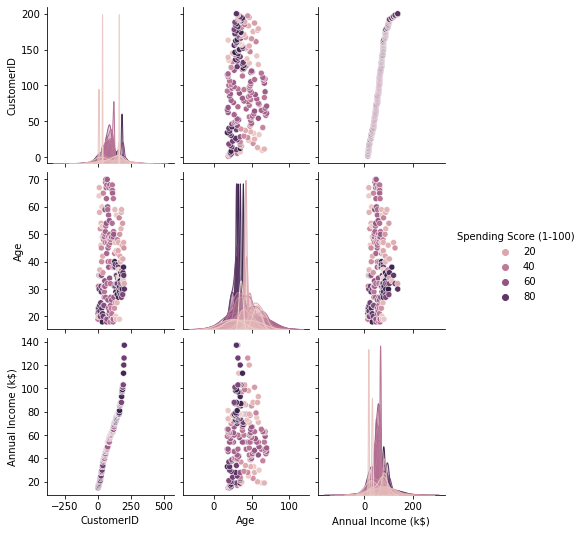

In [12]:
sns.pairplot(
    data=df, 
    aspect=.85,
    hue='Spending Score (1-100)');

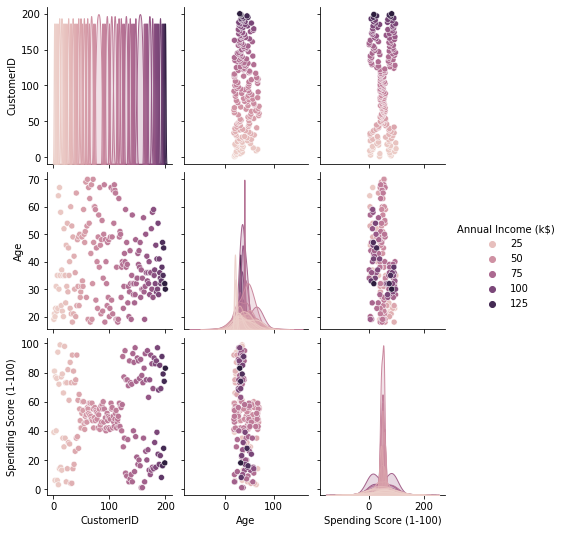

In [13]:
sns.pairplot(
    data=df, 
    aspect=.85,
    hue='Annual Income (k$)');

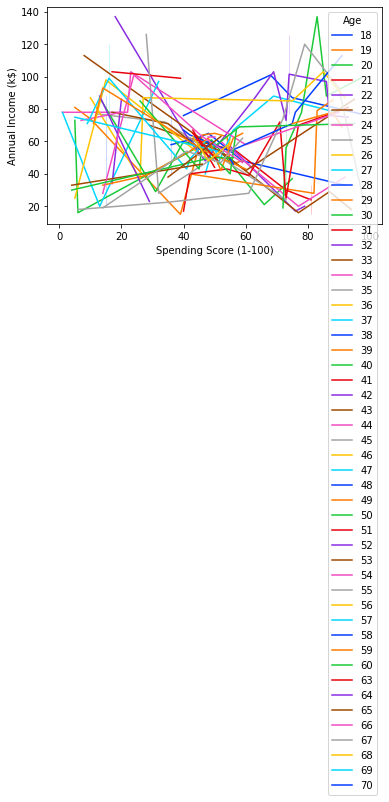

In [14]:
sns.lineplot(
    x="Spending Score (1-100)", 
    y="Annual Income (k$)",
    data=df,
    palette='bright',
    hue='Age')


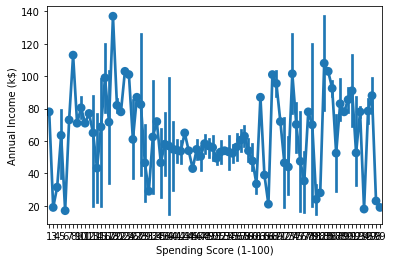

In [15]:
sns.pointplot(
    x='Spending Score (1-100)', 
    y='Annual Income (k$)', 
    data=df);

#4. Perform descriptive statistics on the dataset.

In [16]:
average = df['Spending Score (1-100)'].mean()
print(average)

50.2


In [17]:
average = df['Annual Income (k$)'].mean()
print(average)

60.56


In [18]:
med = df['Spending Score (1-100)'].median()
print(med)

50.0


In [19]:
med = df['Annual Income (k$)'].median()
print(med)

61.5


In [20]:
standard_deviation = df['Spending Score (1-100)'].std()
print(standard_deviation)

25.823521668370173


In [21]:
standard_deviation = df['Annual Income (k$)'].std()
print(standard_deviation)

26.264721165271244


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


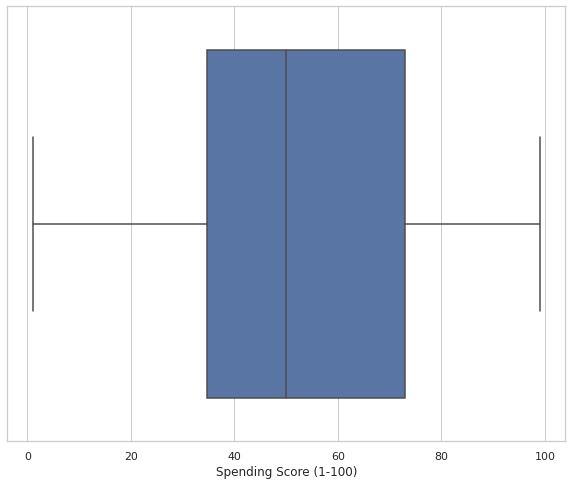

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Spending Score (1-100)', data=df, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


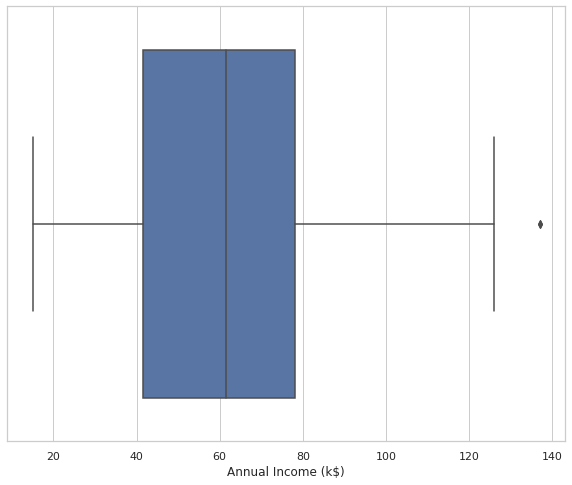

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Annual Income (k$)', data=df, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


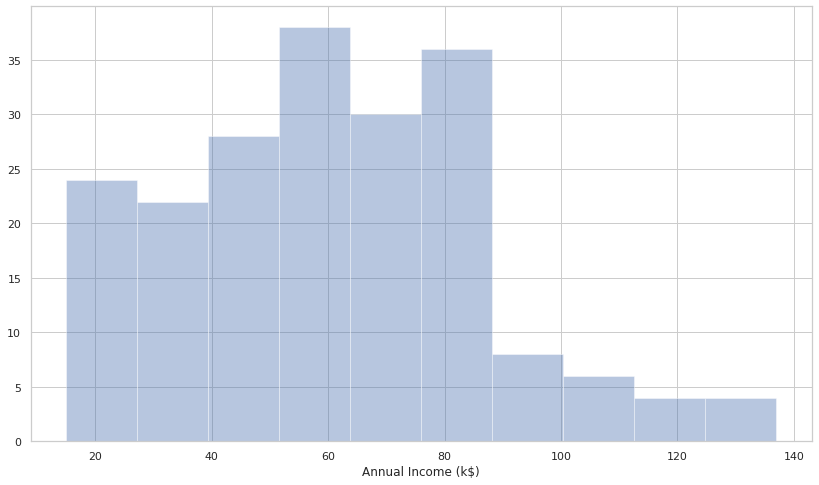

In [24]:
filter_data = df.dropna(subset=['Annual Income (k$)'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Annual Income (k$)'], kde=False)

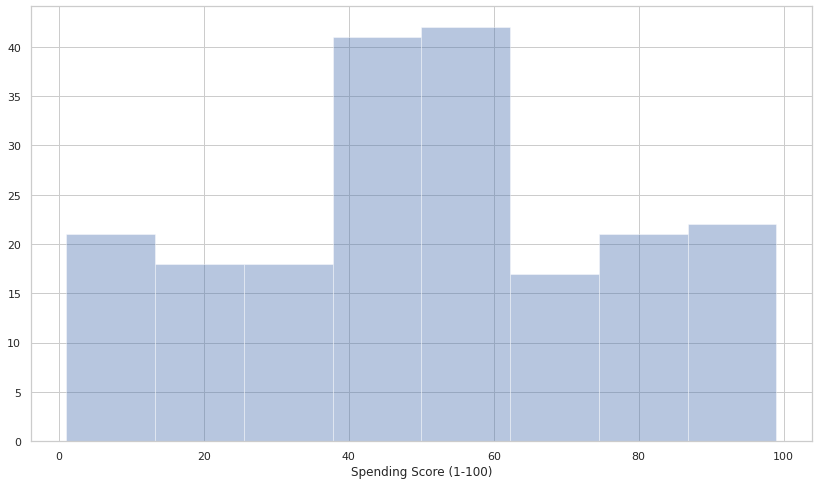

In [25]:
filter_data = df.dropna(subset=['Spending Score (1-100)'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Spending Score (1-100)'], kde=False)

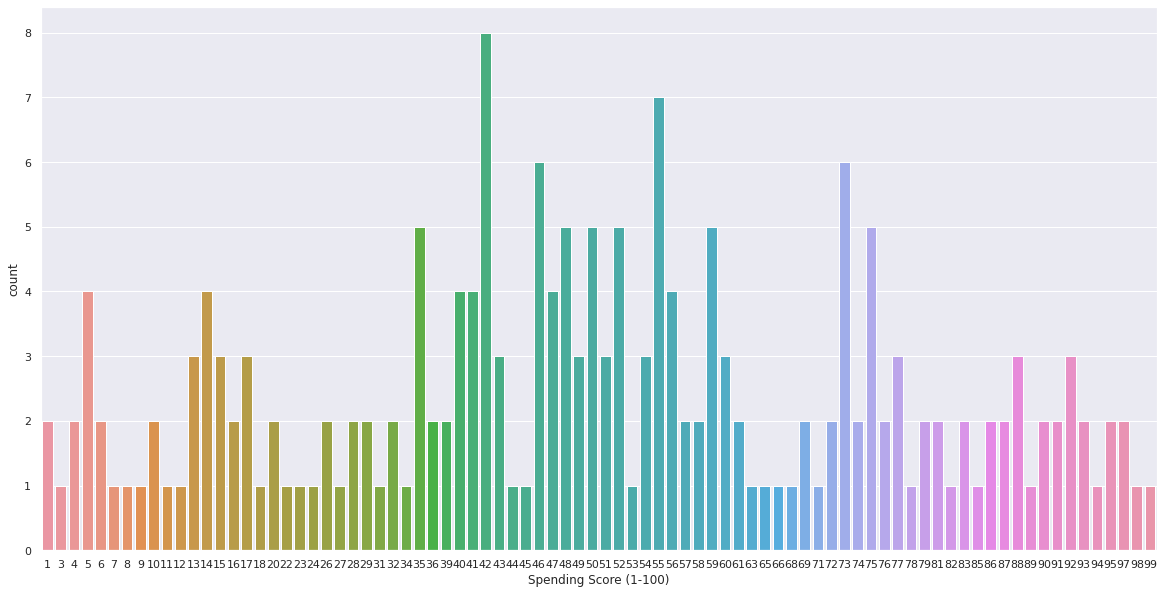

In [26]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Spending Score (1-100)', data=df)

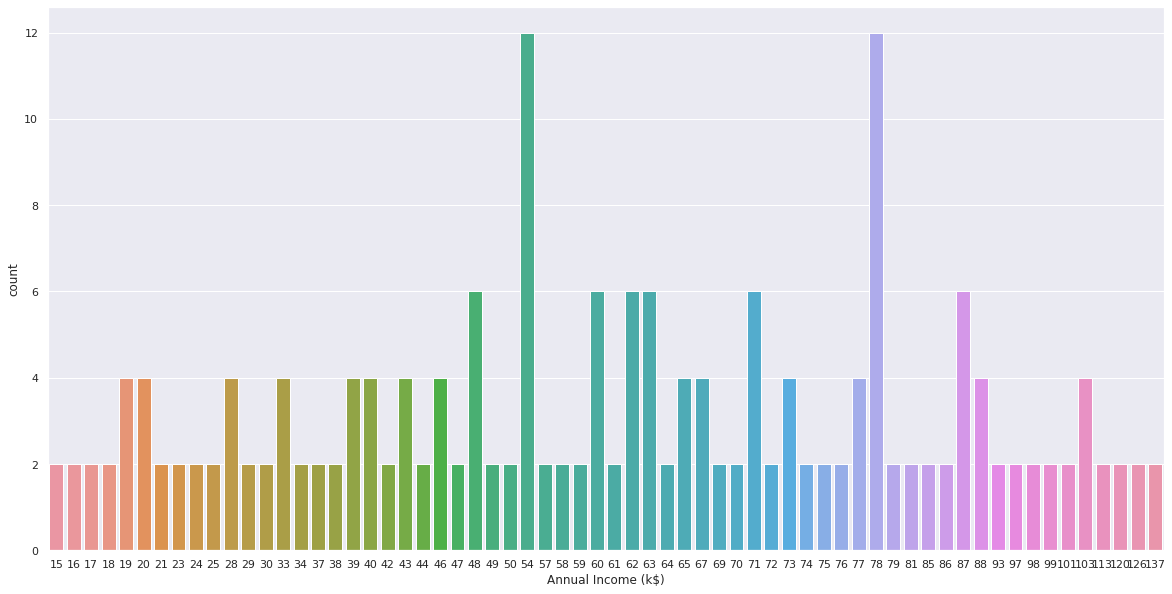

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual Income (k$)', data=df)

#5. Check for Missing values and deal with them.

In [28]:
df.isnull().sum().sum()

0

#6. Find the outliers and replace them outliers

In [29]:
import plotly.express as px
df=pd.read_csv('Mall_Customers.csv')
df1= px.histogram(df, x='Spending Score (1-100)')
df1.show()

In [30]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           )
       )
   return df

In [31]:
df['Spending Score (1-100)'] = impute_outliers_IQR(df['Spending Score (1-100)'])
df.describe()['Spending Score (1-100)']

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

#7. Check for Categorical columns and perform encoding.

In [32]:
df_numeric = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_categorical = df[['Gender']]

In [33]:
df_numeric.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39.0
1,2,21,15,81.0
2,3,20,16,6.0
3,4,23,16,77.0
4,5,31,17,40.0


In [34]:
df_categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [35]:
print(df['Gender'].unique())

['Male' 'Female']


In [36]:
from sklearn.preprocessing import LabelEncoder

m1 = LabelEncoder()

In [37]:
m1.fit(df_categorical['Gender'])

LabelEncoder()

In [38]:
m2 = m1.transform(df_categorical['Gender'])

In [39]:
print("Before Encoding:", list(df_categorical['Gender'][-10:]))
print("After Encoding:", m2[-10:])
print("The inverse from the encoding result:", m1.inverse_transform(m2[-10:]))

Before Encoding: ['Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
After Encoding: [0 0 1 0 0 0 0 1 1 1]
The inverse from the encoding result: ['Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Male' 'Male']


#8. Scaling the data

In [40]:
from sklearn import preprocessing
df= pd.read_csv('Mall_Customers.csv')
X_data = df.Age
target = df.Gender
standard = preprocessing.scale(X_data)
print(standard)

[-1.42456879 -1.28103541 -1.3528021  -1.13750203 -0.56336851 -1.20926872
 -0.27630176 -1.13750203  1.80493225 -0.6351352   2.02023231 -0.27630176
  1.37433211 -1.06573534 -0.13276838 -1.20926872 -0.27630176 -1.3528021
  0.94373197 -0.27630176 -0.27630176 -0.99396865  0.51313183 -0.56336851
  1.08726535 -0.70690189  0.44136514 -0.27630176  0.08253169 -1.13750203
  1.51786549 -1.28103541  1.01549866 -1.49633548  0.7284319  -1.28103541
  0.22606507 -0.6351352  -0.20453507 -1.3528021   1.87669894 -1.06573534
  0.65666521 -0.56336851  0.7284319  -1.06573534  0.80019859 -0.85043527
 -0.70690189 -0.56336851  0.7284319  -0.41983513 -0.56336851  1.4460988
  0.80019859  0.58489852  0.87196528  2.16376569 -0.85043527  1.01549866
  2.23553238 -1.42456879  2.02023231  1.08726535  1.73316556 -1.49633548
  0.29783176  2.091999   -1.42456879 -0.49160182  2.23553238  0.58489852
  1.51786549  1.51786549  1.4460988  -0.92220196  0.44136514  0.08253169
 -1.13750203  0.7284319   1.30256542 -0.06100169  2.0

#9. Perform any of the clustering algorithms

In [41]:
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

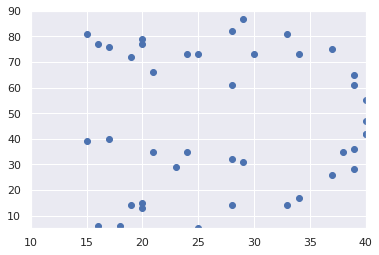

In [42]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlim(10,40)
plt.ylim(5,90)
plt.show()

In [43]:
v = df.iloc[:,1:3]

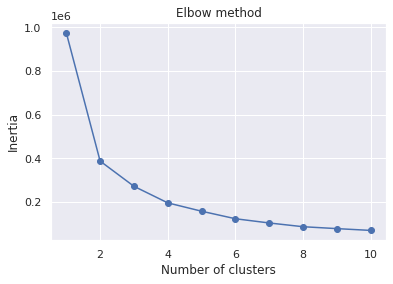

In [44]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_numeric)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [45]:
cols = df.columns

In [48]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

In [49]:
df = pd.DataFrame(df, columns=[cols])

In [50]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 


#10. Add the cluster data with the primary dataset

It was added to dataset

#11. Split the data into dependent and independent variables.

In [54]:
Y = df.iloc[:, -1].values
print(Y)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [55]:
X = df.iloc[:, :-1].values
print(X)

[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan na

#12. Split the data into training and testing

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [57]:
data1 = pd.read_csv('/content/Mall_Customers.csv')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [59]:
X_train

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, n

In [60]:
y_train

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(200, 4) (190, 4) (10, 4)


In [62]:
print(Y.shape, y_train.shape, y_test.shape)

(200,) (190,) (10,)


#13. Build the Model

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [64]:
dataset = pd.read_csv("Mall_Customers.csv")

In [65]:
dataset.head(12)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [66]:
dataset.shape

(200, 5)

In [67]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [68]:
y = dataset["Spending Score (1-100)"]
X = dataset[["Annual Income (k$)","Age"]]
X.head()

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31


In [69]:
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [70]:
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

#14. Train the Model

In [71]:
X_train

,Annual Income (k$),Age
182,98,46
51,42,33
184,99,41
140,75,57
82,54,67
...,...,...
151,78,39
67,48,68
25,28,29
196,126,45


In [72]:
y_train

182    15
51     60
184    39
140     5
82     41
       ..
151    88
67     48
25     82
196    28
175    86
Name: Spending Score (1-100), Length: 134, dtype: int64

#15. Test the Model

In [73]:
X_test

,Annual Income (k$),Age
86,57,55
120,67,27
22,25,46
11,19,35
195,120,35
...,...,...
58,46,27
113,64,19
149,78,34
36,34,42


In [74]:
y_test

86     58
120    56
22      5
11     99
195    79
       ..
58     51
113    46
149    90
36     17
192     8
Name: Spending Score (1-100), Length: 66, dtype: int64

In [75]:
model = DecisionTreeClassifier()

In [76]:
model.fit(X_train.astype('int'), y_train.astype('int'))

DecisionTreeClassifier()

In [77]:
predictions = model.predict(X_train)
print(accuracy_score(y_train.astype('int'), predictions.astype('int')))

0.9626865671641791


#16. Measure the performance using Evaluation Metrics.

In [78]:
predictions = model.predict(X_test)

In [79]:
predictions

array([46, 34, 32,  6, 23, 77, 91, 40, 42, 46, 55, 49, 12, 41, 39, 97,  4,
       42, 91, 45, 15,  1, 74, 49, 39, 75, 56, 18, 52, 86, 48, 52, 26, 55,
       34, 44,  7, 86, 46, 49, 91,  5, 48, 95, 35, 28, 92, 18, 66, 20, 14,
       87, 56, 55, 91, 32, 14, 73, 12, 40, 40, 47, 54,  1, 26, 18])

In [80]:
print(accuracy_score(y_test.astype('int'), predictions.astype('int')))

0.0


In [81]:
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df

,Annual Income (k$),Age,Actual,Prediction
86,57,55,58,46
120,67,27,56,34
22,25,46,5,32
11,19,35,99,6
195,120,35,79,23
...,...,...,...,...
58,46,27,51,47
113,64,19,46,54
149,78,34,90,1
36,34,42,17,26


In [82]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [83]:
import tracemalloc
import pandas as pd
import dask.dataframe as dd
import time

In [84]:
def tracing_start():
    tracemalloc.stop()
    print("nTracing Status : ", tracemalloc.is_tracing())
    tracemalloc.start()
    print("Tracing Status : ", tracemalloc.is_tracing())
def tracing_mem():
    first_size, first_peak = tracemalloc.get_traced_memory()
    peak = first_peak/(1024*1024)
    print("Peak Size in MB - ", peak)

In [85]:
tracing_start()
start = time.time()
sq_list1 = [elem + elem**2 for elem in range(1,1000)]
#print(sq_list1)
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
time elapsed 1.867532730102539 milli seconds
Peak Size in MB -  0.04671478271484375


In [86]:
tracing_start()
start = time.time()
list_word = ["Quantify","performance","improvements","in","Python"]
s = ""
for substring in list_word:
    s += substring + " "
print(s) 
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
Quantify performance improvements in Python 
time elapsed 2.2280216217041016 milli seconds
Peak Size in MB -  0.011841773986816406


In [87]:
tracing_start()
start = time.time()
a = [2,3,3,2,5,4,4,6,5,7,7,3,3,4,7,2,5,2,5]
b = []
for i in a:
    if i not in b:
        b.append(i)
print(b)
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
[2, 3, 5, 4, 6, 7]
time elapsed 3.3278465270996094 milli seconds
Peak Size in MB -  0.012000083923339844


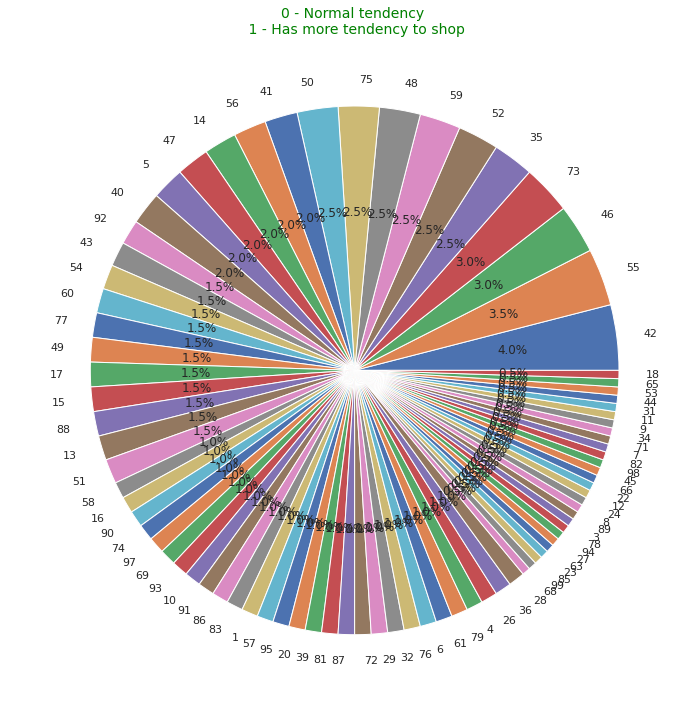

In [88]:
plt.figure(figsize=(10,10))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Normal tendency \n 1 - Has more tendency to shop', size=14, c='green')
plt.tight_layout()
plt.show()